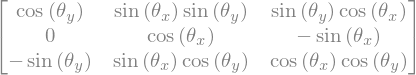

In [43]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.mechanics import dynamicsymbols, init_vprinting, msubs

init_printing()
init_vprinting()

theta, theta1, theta2, theta3, theta4, theta5, theta_x, theta_y, theta_z = symbols('theta theta_1 theta_2 theta_3 theta_4 theta_5 theta_x theta_y theta_z')

R_z = Matrix([[cos(theta_z), -sin(theta_z), 0],
              [sin(theta_z), cos(theta_z), 0],
              [0, 0, 1]])

R_y = Matrix([[cos(theta_y), 0, sin(theta_y)],
              [0, 1, 0],
              [-sin(theta_y), 0, cos(theta_y)]])

R_x = Matrix([[1, 0, 0],
              [0, cos(theta_x), -sin(theta_x)],
              [0, sin(theta_x), cos(theta_x)]])

R_z_y = R_z * R_y
R_z_y

R_y_x = R_y * R_x
R_y_x

In [54]:
#Transformation from Hip axis 3 to to Hip axis 2 frame
R01_raw = Matrix([[0, 1, 0],
                  [0, 0, 1],
                  [1, 0, 0]])

R01_theta1 = Matrix([[cos(theta1), -sin(theta1), 0],
                     [sin(theta1), cos(theta1), 0],
                     [0, 0, 1]])

R01 = R01_theta1 * R01_raw

R12_raw = Matrix([[0, 0, 1],
                  [0, 1, 0],
                  [-1, 0, 0]])

R12_theta2 = Matrix([[cos(theta2), 0, sin(theta2)],
                     [0, 1, 0],
                     [-sin(theta2), 0, cos(theta2)]])

R12 = R12_theta2 * R12_raw

R23_raw = Matrix([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

R23_theta3 = Matrix([[1, 0, 0],
                     [0, cos(theta3), -sin(theta3)],
                     [0, sin(theta3), cos(theta3)]])

R23 = R23_theta3 * R23_raw


R34_raw = Matrix([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

R34_theta4 = Matrix([[1, 0, 0],
                     [0, cos(theta4), -sin(theta4)],
                     [0, sin(theta4), cos(theta4)]])

R34 = R34_theta4 * R34_raw


#Transformation from Ankle to end-effector/foot_base frame
R45_raw = Matrix([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])

R45_theta5 = Matrix([[1, 0, 0],
                     [0, cos(theta5), -sin(theta5)],
                     [0, sin(theta5), cos(theta5)]])

R45 = R45_theta5 * R45_raw 

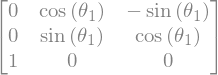

In [55]:
R01

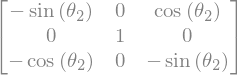

In [56]:
R12

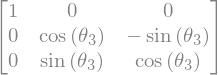

In [57]:
R23

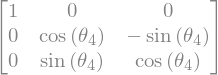

In [58]:
R34

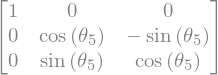

In [59]:
R45

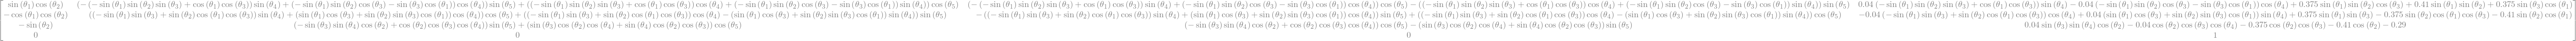

In [51]:
##THESE HAVE TO BE UPDATED ACCORDING TO THE ROTATION MATRICES ABOVE!##
H01 = Matrix([[0, cos(theta1), -sin(theta1), 0],
              [0, sin(theta1), cos(theta1), 0],
              [1, 0, 0, -0.145],
              [0, 0, 0, 1]])

H12 = Matrix([[-sin(theta2), 0, cos(theta2), -0.145],
              [0, 1, 0, 0],
              [-cos(theta2), 0, sin(theta2), 0],
              [0, 0, 0, 1]])

H23 = Matrix([[1, 0, 0, 0],
              [0, cos(theta3), -sin(theta3), 0],
              [0, sin(theta3), cos(theta3), -0.41],
              [0, 0, 0, 1]])

H34 = Matrix([[1, 0, 0, 0],
              [0, cos(theta4), -sin(theta4), 0],
              [0, sin(theta4), cos(theta4), -0.375],
              [0, 0, 0, 1]])

H45 = Matrix([[1, 0, 0, 0],
              [0, cos(theta5), -sin(theta5), 0],
              [0, sin(theta5), cos(theta5), -0.04],
              [0, 0, 0, 1]])

H05 = H01 * H12 * H23 * H34 * H45
H05

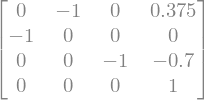

In [78]:
H04_subs_1 = H04.subs({theta1:0, theta2:0, theta3:pi/2, theta4:pi/2, theta5:0})
H04_subs_1

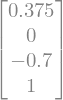

In [79]:
p = Matrix([0, 0, 0, 1])
H04_subs_1 * p